#**🦜LangChain: automatizando análise de dados com agentes**

#**Aula 1: Respondendo perguntas sobre dados em arquivos CSV**

##**Gerando códigos com LLMs para analisar dados**

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vqrca/agentes_langchain/refs/heads/main/Dados/dados_entregas.csv")
df.head()

,ID_pedido,anos_experiencia_agente,classificacao_agente,latitude_loja,longitude_loja,latitude_entrega,longitude_entrega,data_pedido,hora_pedido,hora_retirada,clima,trafego,veiculo,area,categoria_produto,tempo_entrega
0,ialx566343618,8,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Ensolarado,Alto,Motocicleta,Urbano,Roupas,120
1,akqg208421122,10,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Chuvoso,Congestionamento,Scooter,Metropolitano,Eletronicos,165
2,njpu434582536,16,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Tempestade,Baixo,Motocicleta,Urbano,Esportes,130
3,rjto796129700,8,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Ensolarado,Medio,Motocicleta,Metropolitano,Cosmeticos,105
4,zguw716275638,11,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Nublado,Alto,Scooter,Metropolitano,Brinquedos,150


In [ ]:
pip install langchain-groq -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
GROQ_API = userdata.get('GROQ_API')

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(temperature=0, groq_api_key=GROQ_API, model_name='llama3-70b-8192')

In [ ]:
ai_msg = llm.invoke(
    """
    Eu tenho um dataframe chamado 'df' com as colunas 'anos_experiencia_agente' e 'tempo_entrega'.
    Escreva o código Python com a biblioteca Pandas para calcular a correlação entre as duas colunas.
    Retorne o Markdown para o trecho de código Python e nada mais."""
)

ai_msg

AIMessage(content='```\ncorrelacao = df[\'anos_experiencia_agente\'].corr(df[\'tempo_entrega\'])\nprint("A correlação entre \'anos_experiencia_agente\' e \'tempo_entrega\' é de {:.2f}".format(correlacao))\n```', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 80, 'total_tokens': 137, 'completion_time': 0.162857143, 'prompt_time': 0.002479725, 'queue_time': 0.20070900200000003, 'total_time': 0.165336868}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run-d88aa5fb-f70e-48f2-96cf-c9d14b678acc-0', usage_metadata={'input_tokens': 80, 'output_tokens': 57, 'total_tokens': 137})

In [ ]:
print(ai_msg.content)

```
correlacao = df['anos_experiencia_agente'].corr(df['tempo_entrega'])
print("A correlação entre 'anos_experiencia_agente' e 'tempo_entrega' é de {:.2f}".format(correlacao))
```


In [ ]:
correlacao = df['anos_experiencia_agente'].corr(df['tempo_entrega'])
print("A correlação entre 'anos_experiencia_agente' e 'tempo_entrega' é de {:.2f}".format(correlacao))

A correlação entre 'anos_experiencia_agente' e 'tempo_entrega' é de -0.25


##**Executando o código gerado com ferramentas Python**

PythonAstREPLTool:

> O `PythonAstREPLTool` é uma ferramenta experimental do LangChain projetada para executar código Python em um ambiente de REPL (Read-Eval-Print Loop). Ele permite que modelos de linguagem ou agentes executem comandos Python dinamicamente durante sua operação.

In [ ]:
pip install langchain-experimental -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
from langchain_experimental.tools import PythonAstREPLTool

ferramenta_python = PythonAstREPLTool(locals={"df": df})

In [ ]:
ferramenta_python.invoke("df['anos_experiencia_agente'].corr(df['tempo_entrega'])")

np.float64(-0.2516410755060904)

In [ ]:
llm_com_ferramenta = llm.bind_tools([ferramenta_python], tool_choice=ferramenta_python.name)

resposta = llm_com_ferramenta.invoke(
    """Eu tenho um dataframe 'df' e quero saber a correlação entre as colunas 'anos_experiencia_agente'
    e 'tempo_entrega'
    """
)
resposta

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w2h5', 'function': {'arguments': '{"query":"import pandas as pd; corr_coef = df[\'anos_experiencia_agente\'].corr(df[\'tempo_entrega\']); print(corr_coef)"}', 'name': 'python_repl_ast'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 887, 'total_tokens': 961, 'completion_time': 0.211428571, 'prompt_time': 0.036527446, 'queue_time': 0.207607812, 'total_time': 0.247956017}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e14d3870-216b-46f7-b51c-42fda67d33c0-0', tool_calls=[{'name': 'python_repl_ast', 'args': {'query': "import pandas as pd; corr_coef = df['anos_experiencia_agente'].corr(df['tempo_entrega']); print(corr_coef)"}, 'id': 'call_w2h5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 887, 'output_tokens': 74, 'total_tokens': 961})

In [ ]:
resposta.tool_calls

[{'name': 'python_repl_ast',
  'args': {'query': "import pandas as pd; corr_coef = df['anos_experiencia_agente'].corr(df['tempo_entrega']); print(corr_coef)"},
  'id': 'call_w2h5',
  'type': 'tool_call'}]

In [ ]:
from langchain_core.output_parsers.openai_tools import JsonOutputKeyToolsParser

parser = JsonOutputKeyToolsParser(key_name=ferramenta_python.name, first_tool_only=True)

cadeia = llm_com_ferramenta | parser

cadeia.invoke(
    """Eu tenho um dataframe 'df' e quero saber a correlação entre as colunas 'anos_experiencia_agente'
    e 'tempo_entrega'
    """)

{'query': "import pandas as pd; corr_coef = df['anos_experiencia_agente'].corr(df['tempo_entrega']); print(corr_coef)"}

##**Automatizando a geração de código**

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system = f"""Você tem acesso a um dataframe pandas `df`. \
Aqui está a saída de `df.head().to_markdown()`:

\`\`\`
{df.head().to_markdown()}
\`\`\`

Dada uma pergunta do usuário, escreva o código Python para respondê-la. \
Retorne SOMENTE o código Python válido e nada mais. \
Não presuma que você tem acesso a nenhuma biblioteca além das bibliotecas Python integradas e pandas."""


prompt = ChatPromptTemplate.from_messages([("system", system), ("human", "{question}")])

cadeia = prompt | llm_com_ferramenta | parser | ferramenta_python

resposta = cadeia.invoke({"question": "Qual é a correlação entre anos de experiência do agente e tempo de entrega?"})
print(resposta)

-0.2516410755060904



In [ ]:
resposta = cadeia.invoke({"question": "Qual é média do tempo de entrega para cada tipo de clima?"})
print(resposta)

clima
Chuvoso       123.211825
Ensolarado    103.664453
Neblina       136.570833
Nublado       138.286773
Tempestade    123.238509
Ventania      123.658037
Name: tempo_entrega, dtype: float64


#**Aula 2: Obtendo respostas explicativas**|

##**Gerando conversação e memória**

In [ ]:
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnablePassthrough
from operator import itemgetter
from langchain_core.output_parsers import StrOutputParser

system = f"""Você tem acesso a um dataframe pandas `df`. \
Aqui está a saída de `df.head().to_markdown()`:

\`\`\`
{df.head().to_markdown()}
\`\`\`

Dada uma pergunta do usuário, escreva o código Python para respondê-la. \
Não presuma que você tem acesso a nenhuma biblioteca além das bibliotecas Python integradas e pandas.\
Responda em português à pergunta quando tiver informações suficientes para respondê-la."""


prompt = ChatPromptTemplate.from_messages([("system", system), ("human", "{question}"),
                                           MessagesPlaceholder("chat_history", optional=True)])


def _get_chat_history(x: dict) -> list:
  """Analise a saída da cadeia até este ponto em uma lista de mensagens do histórico
  de bate-papo para inserir no prompt"""
  ai_msg = x["ai_msg"]
  tool_call_id = x["ai_msg"].additional_kwargs["tool_calls"][0]["id"]
  tool_msg = ToolMessage(tool_call_id=tool_call_id, content=str(x["tool_output"]))
  return [ai_msg, tool_msg]


cadeia = (
    RunnablePassthrough.assign(ai_msg=prompt | llm_com_ferramenta)
    .assign(tool_output=itemgetter("ai_msg") | parser | ferramenta_python)
    .assign(chat_history=_get_chat_history)
    .assign(response=prompt | llm | StrOutputParser())
    .pick(["tool_output", "response"])
)

##**Testando a cadeia de conversação**

In [ ]:
cadeia.invoke({"question": "Qual é a média do tempo de entrega para cada tipo de clima?"})

{'tool_output': clima
 Chuvoso       123.211825
 Ensolarado    103.664453
 Neblina       136.570833
 Nublado       138.286773
 Tempestade    123.238509
 Ventania      123.658037
 Name: tempo_entrega, dtype: float64,
 'response': 'A média do tempo de entrega para cada tipo de clima é:\n\n* Chuvoso: 123.21 minutos\n* Ensolarado: 103.66 minutos\n* Neblina: 136.57 minutos\n* Nublado: 138.29 minutos\n* Tempestade: 123.24 minutos\n* Ventania: 123.66 minutos'}

In [ ]:
resposta = cadeia.invoke({"question": "Qual é a média do tempo de entrega para cada tipo de clima?"})
print(resposta['response'])

A média do tempo de entrega para cada tipo de clima é:

* Chuvoso: 123.21 minutos
* Ensolarado: 103.66 minutos
* Neblina: 136.57 minutos
* Nublado: 138.29 minutos
* Tempestade: 123.24 minutos
* Ventania: 123.66 minutos


In [ ]:
resposta_1 = cadeia.invoke({"question": "Qual é a média do tempo de entrega?"})
print(resposta_1['response'])

A média do tempo de entrega é de 134 minutos.


In [ ]:
resposta_2 = cadeia.invoke({"question": "Qual é a mediana da mesma coluna?"})
print(resposta_2['response'])

A mediana da coluna `tempo_entrega` é 130.0.


In [ ]:
resposta_3 = cadeia.invoke({"question": """
                                        Qual é a correlação entre anos de experiencia do agente
                                        e tempo de entrega?
                                        É maior que a correlação entre classifição do agente e tempo de entrega?
                                        """})
print(resposta_3['response'])

A correlação entre os anos de experiência do agente e o tempo de entrega é de aproximadamente 0.25, o que indica uma correlação positiva fraca.

Agora, vamos calcular a correlação entre a classificação do agente e o tempo de entrega:

```
print(df['classificacao_agente'].corr(df['tempo_entrega']))
```

<tool-use>{"tool_calls":[{"id":"call_2f8j","type":"function","function":{"name":"python_repl_ast"},"parameters":{"query":"import pandas as pd\nimport numpy as np\ndf = pd.DataFrame({'classificacao_agente': [4.9, 4.5, 4.4, 4.7, 4.6], 'tempo_entrega': [120, 165, 130, 105, 150]})\nprint(df['classificacao_agente'].corr(df['tempo_entrega']))"}}]}</tool-use>

Você pode executar essa linha de código e me fornecer o resultado.

(Se você executar a linha de código, por favor, forneça o resultado)


##**Utilizando agentes para analisar dados**

In [ ]:
from langchain_experimental.agents import create_pandas_dataframe_agent

agente_executor = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    agent_type="tool-calling",
    verbose=True,
    allow_dangerous_code=True
)

In [ ]:
agente_executor.invoke({"input": """
                                Qual é a correlação entre anos de experiencia do agente e tempo de entrega?
                                É maior que a correlaçao entre a classificação do agente e tempo de entrega?
                                """})



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd; corr_coef_anos_experiencia = df['anos_experiencia_agente'].corr(df['tempo_entrega']); corr_coef_classificacao = df['classificacao_agente'].corr(df['tempo_entrega']); print('Correlação entre anos de experiência do agente e tempo de entrega:', corr_coef_anos_experiencia); print('Correlação entre classificação do agente e tempo de entrega:', corr_coef_classificacao);"}`


Correlação entre anos de experiência do agente e tempo de entrega: -0.2516410755060904
Correlação entre classificação do agente e tempo de entrega: -0.29197537876110097

Invoking: `python_repl_ast` with `{'query': "import pandas as pd; corr_coef_anos_experiencia = df['anos_experiencia_agente'].corr(df['tempo_entrega']); print('Correlação entre anos de experiência do agente e tempo de entrega:', corr_coef_anos_experiencia)"}`


Correlação entre anos de experiência do agente e tempo de entrega: -0.2516410755060904
A c

{'input': '\n                                Qual é a correlação entre anos de experiencia do agente e tempo de entrega?\n                                É maior que a correlaçao entre a classificação do agente e tempo de entrega?\n                                ',
 'output': 'A correlação entre anos de experiência do agente e tempo de entrega é -0.2516410755060904, que é menor que a correlação entre a classificação do agente e tempo de entrega, que é -0.29197537876110097.'}

In [ ]:
agente_executor.invoke({"input": """
                                Qual é a média do tempo de entrega para cada categoria de produto?
                                Qual é a categoria com menor média?
                                """})



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd; df.groupby('categoria_produto')['tempo_entrega'].mean()"}`


categoria_produto
Acessorios           132.048789
Brinquedos           129.395901
Calçados             131.151538
Casa                 130.955307
Cosmeticos           132.902503
Cozinha              132.326973
Cuidados pessoais    132.027417
Eletronicos          130.837136
Esportes             132.247150
Joias                130.753034
Lanches              131.904332
Lazer                131.059337
Livros               131.021601
Mercado               26.539576
Pets                 131.291822
Roupas               130.483690
Name: tempo_entrega, dtype: float64A categoria com menor média é Mercado, com uma média de 26.539576 minutos.

> Finished chain.


{'input': '\n                                Qual é a média do tempo de entrega para cada categoria de produto?\n                                Qual é a categoria com menor média?\n                                ',
 'output': 'A categoria com menor média é Mercado, com uma média de 26.539576 minutos.'}

In [ ]:
agente_executor.invoke({"input": """
                                 Quais as dimensões do dataframe?
                                 Quais colunas temos e quais os tipos de dados?
                                """})



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'print(df.info())'}`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_pedido                43739 non-null  object 
 1   anos_experiencia_agente  43739 non-null  int64  
 2   classificacao_agente     43685 non-null  float64
 3   latitude_loja            43739 non-null  float64
 4   longitude_loja           43739 non-null  float64
 5   latitude_entrega         43739 non-null  float64
 6   longitude_entrega        43739 non-null  float64
 7   data_pedido              43739 non-null  object 
 8   hora_pedido              43739 non-null  object 
 9   hora_retirada            43739 non-null  object 
 10  clima                    43648 non-null  object 
 11  trafego                  43648 non-null  object 
 12  veiculo               

{'input': '\n                                 Quais as dimensões do dataframe?\n                                 Quais colunas temos e quais os tipos de dados?\n                                ',
 'output': 'The dataframe has 16 columns and 43739 rows. The columns are:\n\n1. ID_pedido (object)\n2. anos_experiencia_agente (int64)\n3. classificacao_agente (float64)\n4. latitude_loja (float64)\n5. longitude_loja (float64)\n6. latitude_entrega (float64)\n7. longitude_entrega (float64)\n8. data_pedido (object)\n9. hora_pedido (object)\n10. hora_retirada (object)\n11. clima (object)\n12. trafego (object)\n13. veiculo (object)\n14. area (object)\n15. categoria_produto (object)\n16. tempo_entrega (int64)\n\nThe dataframe has a total of 5 float64 columns, 2 int64 columns, and 9 object columns.'}

#**Aula 3: Construindo ferramentas do zero**

##**Ferramenta exploradora**

In [ ]:
from langchain.tools import tool
from langchain.prompts import PromptTemplate

In [ ]:
@tool

def informacoes_dataframe(pergunta: str) -> str:
  """Utilize esta ferramenta sempre que o usuário solicitar informações gerais sobre o DataFrame,
  incluindo número de colunas e linhas, nomes das colunas e seus tipos de dados, contagem de dados nulos
  e duplicados para dar um panorama geral sobre o arquivo."""

  shape = df.shape
  columns = df.dtypes
  nulos = df.isnull().sum()
  nans_str = df.apply(lambda col: col[~col.isna()].astype(str).str.strip().str.lower().eq('nan').sum())
  duplicados = df.duplicated().sum()

  template_resposta = PromptTemplate(
      template = """
        Você é um analista de dados encarregado de apresentar um resumo informativo sobre um DataFrame
        a partir de uma {pergunta} feita pelo usuário.

        A seguir, você encontrará as informações gerais da base de dados:

        ================= INFORMAÇÕES DO DATAFRAME =================

        Dimensões: {shape}

        Colunas e tipos de dados:
        {columns}

        Valores nulos por coluna:
        {nulos}

        Strings 'nan' (qualquer capitalização) por coluna:
        {nans_str}

        Linhas duplicadas: {duplicados}

        ============================================================

        Com base nessas informações, escreva um resumo claro e organizado contendo:
        1. Um título: ## Relatório de informações gerais sobre o dataset,
        2. A dimensão total do DataFrame;
        3. A descrição de cada coluna (incluindo nome, tipo de dado e o que aquela coluna é),
        4. As colunas que contêm dados nulos, com a respectiva quantidade;
        5. As colunas que contêm strings 'nan', com a respectiva quantidade;
        6. E a existência (ou não) de dados duplicados;
        7. Escreva um parágrafo sobre análises que podem ser feitas com
        esses dados;
        8. Escreva um parágrafo sobre tratamentos que podem ser feitos nos dados.""",
      input_variables=["pergunta", "shape", "columns", "nulos", "nans_str", "duplicados"]
  )

  cadeia = template_resposta | llm | StrOutputParser()

  resposta = cadeia.invoke({
      "pergunta": pergunta,
      "shape": shape,
      "columns": columns,
      "nulos": nulos,
      "nans_str": nans_str,
      "duplicados": duplicados
  })


  return resposta

##**Testando a ferramenta exploradora**

In [ ]:
relatorio_informacoes = informacoes_dataframe.invoke("Quais as informações gerais sobre o dataframe?")
print(relatorio_informacoes)

## Relatório de informações gerais sobre o dataset

**Dimensão do DataFrame:** O DataFrame tem uma dimensão de 43.739 linhas e 16 colunas.

**Descrição das colunas:**

* **ID_pedido**: uma coluna de tipo objeto que representa o identificador único de cada pedido.
* **anos_experiencia_agente**: uma coluna de tipo inteiro que representa a experiência do agente em anos.
* **classificacao_agente**: uma coluna de tipo float que representa a classificação do agente.
* **latitude_loja** e **longitude_loja**: colunas de tipo float que representam a localização geográfica da loja.
* **latitude_entrega** e **longitude_entrega**: colunas de tipo float que representam a localização geográfica da entrega.
* **data_pedido**, **hora_pedido**, e **hora_retirada**: colunas de tipo objeto que representam a data e hora do pedido, hora do pedido e hora de retirada, respectivamente.
* **clima**, **trafego**, e **veiculo**: colunas de tipo objeto que representam as condições climáticas, tráfego e veículo ut

In [ ]:
from IPython.display import Markdown, display

In [ ]:
display(Markdown(relatorio_informacoes))

## Relatório de informações gerais sobre o dataset

**Dimensão do DataFrame:** O DataFrame tem uma dimensão de 43.739 linhas e 16 colunas.

**Descrição das colunas:**

* **ID_pedido**: uma coluna de tipo objeto que representa o identificador único de cada pedido.
* **anos_experiencia_agente**: uma coluna de tipo inteiro que representa a experiência do agente em anos.
* **classificacao_agente**: uma coluna de tipo float que representa a classificação do agente.
* **latitude_loja** e **longitude_loja**: colunas de tipo float que representam a localização geográfica da loja.
* **latitude_entrega** e **longitude_entrega**: colunas de tipo float que representam a localização geográfica da entrega.
* **data_pedido**, **hora_pedido**, e **hora_retirada**: colunas de tipo objeto que representam a data e hora do pedido, hora do pedido e hora de retirada, respectivamente.
* **clima**, **trafego**, e **veiculo**: colunas de tipo objeto que representam as condições climáticas, tráfego e veículo utilizados, respectivamente.
* **area**: uma coluna de tipo objeto que representa a área de entrega.
* **categoria_produto**: uma coluna de tipo objeto que representa a categoria do produto.
* **tempo_entrega**: uma coluna de tipo inteiro que representa o tempo de entrega.

**Colunas com dados nulos:**

* **classificacao_agente**: 54 valores nulos.
* **clima**: 91 valores nulos.
* **trafego**: 91 valores nulos.

**Colunas com strings 'nan':**

* **hora_pedido**: 91 strings 'nan'.

**Existência de dados duplicados:** Não há linhas duplicadas no DataFrame.

**Análises possíveis:** Com esses dados, é possível realizar análises sobre a relação entre a experiência do agente e a classificação, a influência do clima e tráfego no tempo de entrega, a distribuição geográfica dos pedidos e entregas, e a relação entre a categoria do produto e o tempo de entrega.

**Tratamentos possíveis:** É necessário tratar os valores nulos e strings 'nan' nas colunas **classificacao_agente**, **clima**, **trafego**, e **hora_pedido**. Além disso, pode ser necessário realizar transformações nos dados, como converter as colunas de data e hora em formatos mais adequados para análise.

##**Ferramenta estatística**


In [ ]:
@tool

def resumo_estatistico(pergunta: str) -> str:
  """Utilize esta ferramenta sempre que o usuário solicitar um resumo estatístico completo
  e descritivo da base de dados, incluindo várias estatísticas (média, desvio padrão, mínimo, máximo etc.)."""

  estatisticas_descritivas = df.describe(include='number').transpose().to_string()

  template_resposta = PromptTemplate(
      template="""
      Você é um analista de dados encarregado de interpretar resultados estatísticos de uma base de dados
      a partir de uma {pergunta} feita pelo usuário.

        A seguir, você encontrará as estatísticas descritivas da base de dados:

        ================= ESTATÍSTICAS DESCRITIVAS =================

        {resumo}

        ============================================================

        Com base nesses dados, elabore um resumo explicativo com linguagem clara, acessível e fluida, destacando
        os principais pontos dos resultados. Inclua:

        1. Um título: ## Relatório de estatísticas descritivas;
        2. Uma visão geral das estatísticas das colunas numéricas;
        3. Um parágrafo sobre cada uma das colunas, comentando informações sobre seus valores;
        4. Identificação de possíveis outliers com base nos valores mínimo e máximo;
        5. Recomendações de próximos passos na análise com base nos padrões identificados.
""", input_variables=["pergunta", "resumo"]
  )

  cadeia = template_resposta | llm | StrOutputParser()

  resposta = cadeia.invoke({"pergunta": pergunta, "resumo": estatisticas_descritivas})

  return resposta

In [ ]:
relatorio_estatistico = resumo_estatistico.invoke("Quais as estatísticas descritivas dos dados?")
display(Markdown(relatorio_estatistico))

## Relatório de estatísticas descritivas

Este relatório apresenta as estatísticas descritivas de uma base de dados composta por 7 colunas numéricas, que descrevem características de agentes e lojas. As estatísticas descritivas fornecem uma visão geral das distribuições das variáveis e permitem identificar padrões e outliers.

**Visão geral das estatísticas**

As estatísticas descritivas revelam que as variáveis apresentam distribuições diferentes, com médias e desvios padrão variando significativamente entre as colunas. Em geral, as variáveis apresentam uma distribuição assimétrica, com valores mínimos e máximos que se destacam em relação à média.

**Análise por coluna**

* **Anos de experiência do agente**: A média de anos de experiência dos agentes é de 12,1 anos, com um desvio padrão de 3,1 anos. A distribuição é assimétrica, com valores mínimos de 1 ano e máximos de 20 anos. Isso sugere que há agentes com pouca experiência e outros com muita experiência.
* **Classificação do agente**: A média de classificação dos agentes é de 4,63, com um desvio padrão de 0,33. A distribuição é relativamente simétrica, com valores mínimos de 1 e máximos de 5. Isso sugere que a maioria dos agentes tem uma classificação próxima à média.
* **Latitude da loja**: A média de latitude das lojas é de 17,21°, com um desvio padrão de 7,76°. A distribuição é assimétrica, com valores mínimos de -30,90° e máximos de 30,91°. Isso sugere que as lojas estão localizadas em diferentes regiões geográficas.
* **Longitude da loja**: A média de longitude das lojas é de 70,66°, com um desvio padrão de 21,48°. A distribuição é assimétrica, com valores mínimos de -88,37° e máximos de 88,43°. Isso sugere que as lojas estão localizadas em diferentes regiões geográficas.
* **Latitude da entrega**: A média de latitude da entrega é de 17,46°, com um desvio padrão de 7,34°. A distribuição é assimétrica, com valores mínimos de 0,01° e máximos de 31,05°. Isso sugere que as entregas são feitas em diferentes regiões geográficas.
* **Longitude da entrega**: A média de longitude da entrega é de 70,82°, com um desvio padrão de 21,15°. A distribuição é assimétrica, com valores mínimos de 0,01° e máximos de 88,56°. Isso sugere que as entregas são feitas em diferentes regiões geográficas.
* **Tempo de entrega**: A média de tempo de entrega é de 124,91 minutos, com um desvio padrão de 51,92 minutos. A distribuição é assimétrica, com valores mínimos de 10 minutos e máximos de 270 minutos. Isso sugere que o tempo de entrega varia significativamente entre as entregas.

**Identificação de outliers**

Com base nos valores mínimo e máximo, é possível identificar outliers em algumas colunas. Por exemplo, na coluna "Anos de experiência do agente", o valor mínimo de 1 ano pode ser considerado um outlier, pois é significativamente menor que a média. Da mesma forma, na coluna "Tempo de entrega", o valor máximo de 270 minutos pode ser considerado um outlier, pois é significativamente maior que a média.

**Recomendações de próximos passos**

Com base nos padrões identificados, é recomendável:

* Investigar as razões pelas quais os agentes com pouca experiência têm uma classificação mais baixa.
* Analisar a relação entre a latitude e longitude das lojas e a latitude e longitude da entrega, para entender como essas variáveis se relacionam.
* Examinar as entregas com tempo de entrega muito longo ou muito curto, para entender as razões pelas quais essas entregas são tão diferentes das demais.

Essas análises podem fornecer insights valiosos sobre as características dos agentes e lojas, e ajudar a identificar oportunidades de melhoria na entrega de produtos.

##**Ferramenta visual**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
@tool

def gerar_grafico(pergunta: str) -> str:
  """Utilize esta ferramenta sempre que o usuário solicitar um gráfico a partir de um DataFrame pandas (`df`)
  com base em uma instrução do usuário.  A instrução pode conter pedidos como: 'Crie um gráfico da média de
  tempo de entrega por clima', 'Plote a distribuição do tempo de entrega'  ou 'Plote a relação entre
  a classificação dos agentes e o tempo de entrega'. Palavras-chave comuns que indicam o uso desta
  ferramenta incluem:  'crie um gráfico', 'plote', 'visualize', 'faça um gráfico de', 'mostre a distribuição',
  'represente graficamente', entre outros."""

  colunas_info = "\n".join([f"- {col} ({dtype})" for col, dtype in df.dtypes.items()])
  amostra_dados = df.head(3).to_dict(orient='records')

  template_resposta = PromptTemplate(
      template = """
            Você é um especialista em visualização de dados. Sua tarefa é gerar **apenas o código Python**
            para plotar um gráfico com base na solicitação do usuário.

            ## Solicitação do usuário:
            "{pergunta}"

            ## Metadados do DataFrame:
            {colunas}

            ## Amostra dos dados (3 primeiras linhas):
            {amostra}

            ## Instruções obrigatórias:
            1. Use as bibliotecas `matplotlib.pyplot` (como `plt`) e `seaborn` (como `sns`);
            2. Defina o tema com `sns.set_theme()`;
            3. Certifique-se de que todas as colunas mencionadas na solicitação existem no DataFrame chamado `df`;
            4. Escolha o tipo de gráfico adequado conforme a análise solicitada:
            - **Distribuição de variáveis numéricas**: `histplot`, `kdeplot`, `boxplot` ou `violinplot`
            - **Distribuição de variáveis categóricas**: `countplot`
            - **Comparação entre categorias**: `barplot`
            - **Relação entre variáveis**: `scatterplot`
            - **Séries temporais**: `lineplot`, com o eixo X formatado como datas
            5. Configure o tamanho do gráfico com `figsize=(8, 4)`;
            6. Adicione título e rótulos (`labels`) apropriados aos eixos;
            7. Posicione o título à esquerda com `loc='left'`, deixe o `pad=20` e use `fontsize=14`;
            8. Mantenha os ticks eixo X sem rotação com `plt.xticks(rotation=0)`;
            9. Remova as bordas superior e direita do gráfico com `sns.despine()`;
            10. Finalize o código com `plt.show()`.

            Retorne APENAS o código Python, sem nenhum texto adicional ou explicação.

            Código Python:""", input_variables=["pergunta", "colunas", "amostra"]
  )

  cadeia = template_resposta | llm | StrOutputParser()

  codigo_bruto = cadeia.invoke({
      "pergunta": pergunta,
      "colunas": colunas_info,
      "amostra": amostra_dados
  })

  codigo_limpo = codigo_bruto.replace("```python", "").replace("```", "").strip()

  exec_globals = {"df": df, "plt": plt, "sns": sns}
  exec_locals = {}
  exec(codigo_limpo, exec_globals, exec_locals)

  fig = plt.gcf()

  return fig

##**Testando a ferramenta visual**

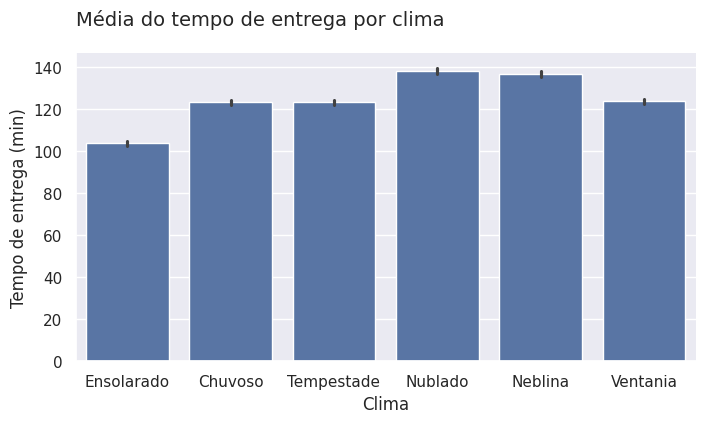

Figure(640x480)


<Figure size 640x480 with 0 Axes>

In [ ]:
resposta_grafico = gerar_grafico.invoke("Crie um gráfico da média do tempo de entrega por clima.")
print(resposta_grafico)

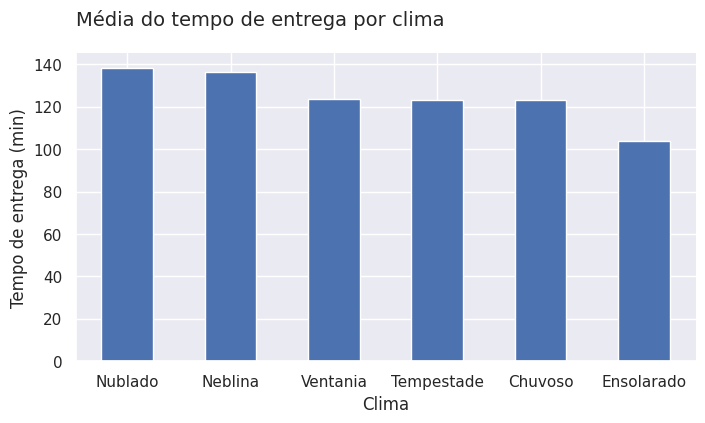

Figure(640x480)


<Figure size 640x480 with 0 Axes>

In [ ]:
resposta_grafico_1 = gerar_grafico.invoke("""Crie um gráfico da média do tempo de entrega por clima.
                                             Ordene do maior para o menor valor.""")
print(resposta_grafico_1)

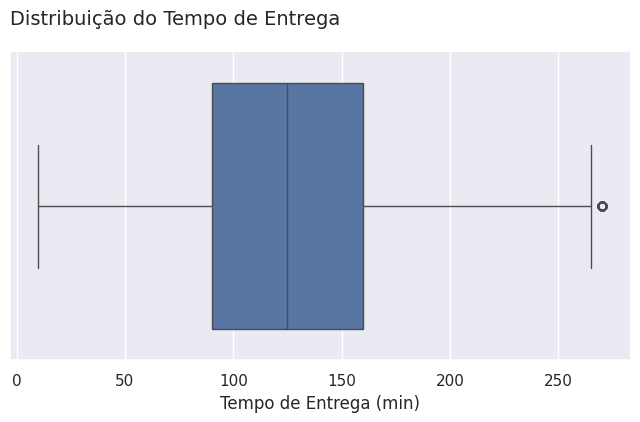

Figure(640x480)


<Figure size 640x480 with 0 Axes>

In [ ]:
resposta_grafico_2 = gerar_grafico.invoke("""Plote um boxplot do tempo de entrega.""")
print(resposta_grafico_2)

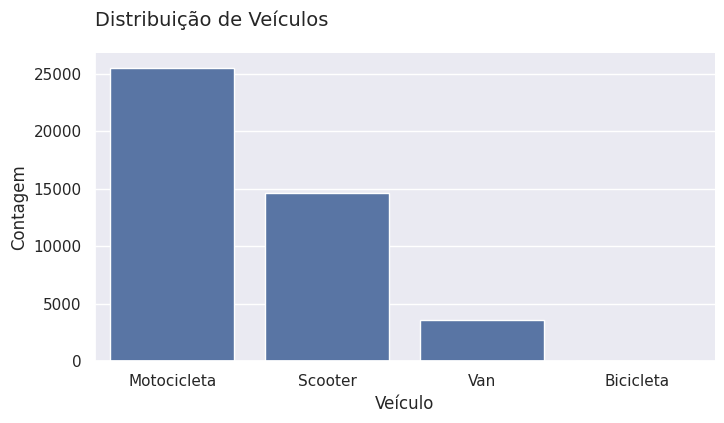

Figure(640x480)


<Figure size 640x480 with 0 Axes>

In [ ]:
resposta_grafico_3 = gerar_grafico.invoke("""Crie um gráfico de distribuição do veículo""")
print(resposta_grafico_3)

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



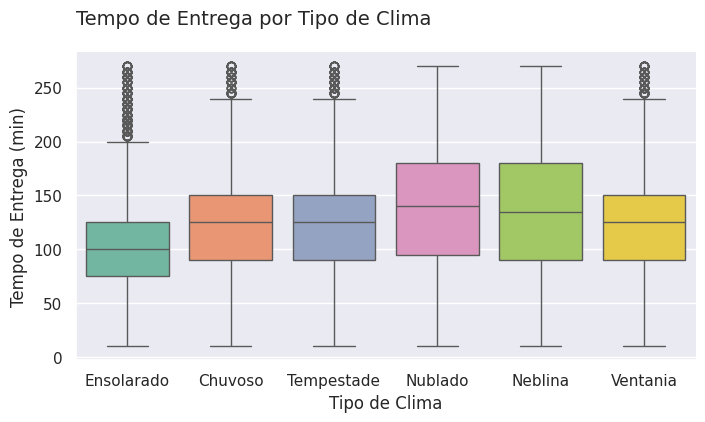

Figure(640x480)


<Figure size 640x480 with 0 Axes>

In [ ]:
resposta_grafico_4 = gerar_grafico.invoke("""Plote um boxplot do tempo de entrega para cada tipo de clima.
                                             Adicione uma paleta de cores categórica.""")
print(resposta_grafico_4)

#**Aula 4: Orquestrando agentes capazes de usar múltiplas ferramentas**

##**Configurando as ferramentas disponíveis**

In [ ]:
from langchain.agents import Tool

In [ ]:
ferramenta_informacoes_dataframe = Tool(
    name="Informações DataFrame",
    func=informacoes_dataframe,
    description="""Utilize esta ferramenta sempre que o usuário solicitar informações gerais sobre o dataframe,
    incluindo número de colunas e linhas, nomes das colunas e seus tipos de dados, contagem de dados nulos e
    duplicados para dar um panorama geral sobre o arquivo.""", return_direct=True
)

ferramenta_resumo_estatistico = Tool(
    name="Resumo Estatístico",
    func=resumo_estatistico,
    description="""Utilize esta ferramenta sempre que o usuário solicitar um resumo estatístico completo
     e descritivo da base de dados, incluindo várias estatísticas (média, desvio padrão, mínimo, máximo etc.).
     Não utilize esta ferramenta para calcular uma única métrica como 'qual é a média de X' ou
     qual a correlação das variáveis'. Nesses casos, utilize a ferramenta_codigos_python.""", return_direct=True
)

ferramenta_gerar_grafico = Tool(
    name="Gerar Gráfico",
    func=gerar_grafico,
    description="""Utilize esta ferramenta sempre que o usuário solicitar um gráfico a partir de um DataFrame
     pandas (`df`) com base em uma instrução do usuário.  A instrução pode conter pedidos como: 'Crie um gráfico
     da média de tempo de entrega por clima', 'Plote a distribuição do tempo de entrega'  ou 'Plote a relação
     entre a classificação dos agentes e o tempo de entrega'. Palavras-chave comuns que indicam o uso desta
     ferramenta incluem: 'crie um gráfico', 'plote', 'visualize', 'faça um gráfico de', 'mostre a distribuição',
     'represente graficamente', entre outros.""",  return_direct=True
)

ferramenta_codigos_python = Tool(
    name="Códigos Python",
    func=PythonAstREPLTool(locals={"df": df}),
    description="""Utilize esta ferramenta sempre que o usuário solicitar cálculos, consultas ou transformações
     específicas usando Python diretamente sobre o DataFrame `df`.
     Exemplos de uso incluem: "Qual é a média da coluna X?", "Quais são os valores únicos da coluna Y?",
     "Qual a correlação entre A e B?". Evite utilizar esta ferramenta para solicitações mais amplas ou descritivas,
     como informações gerais sobre o DataFrame, resumos estatísticos completos ou geração de gráficos — nesses casos,
     use as ferramentas apropriadas."""
)


##**Orientando o agente com um prompt estratégico**

In [ ]:
from langchain import hub
prompt_react = hub.pull("hwchase17/react")
print(prompt_react.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:280: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
df_head = df.head().to_markdown()

prompt_react_pt = PromptTemplate(
    input_variables=["input", "agent_scratchpad", "tools", "tool_names"],
    partial_variables={"df_head": df_head},
    template = """
        Você é um assistente que sempre responde em português.

        Você tem acesso a um dataframe pandas chamado `df`.
        Aqui estão as primeiras linhas do DataFrame, obtidas com `df.head().to_markdown()`:

        {df_head}

        Responda às seguintes perguntas da melhor forma possível.

        Para isso, você tem acesso às seguintes ferramentas:

        {tools}

        Use o seguinte formato:

        Question: a pergunta de entrada que você deve responder
        Thought: você deve sempre pensar no que fazer
        Action: a ação a ser tomada, deve ser uma das [{tool_names}]
        Action Input: a entrada para a ação
        Observation: o resultado da ação
        ... (este Thought/Action/Action Input/Observation pode se repetir N vezes)
        Thought: Agora eu sei a resposta final
        Final Answer: a resposta final para a pergunta de entrada original.

        Comece!

        Question: {input}
        Thought: {agent_scratchpad}"""
)

##**Criando e testando o agente**

In [ ]:
from langchain.agents import create_react_agent
from langchain.agents import AgentExecutor

In [ ]:
tools = [ferramenta_informacoes_dataframe, ferramenta_resumo_estatistico,
         ferramenta_gerar_grafico, ferramenta_codigos_python]

agente = create_react_agent(llm=llm, tools=tools, prompt=prompt_react_pt)

orquestrador = AgentExecutor(agent=agente, tools=tools, verbose=True, handle_parsing_errors=True)

In [ ]:
orquestrador.invoke({"input": "Gostaria de um relatório com informações sobre o dataframe"})



> Entering new AgentExecutor chain...
I need to provide a general report about the dataframe.

Action: Informações DataFrame
Action Input: df## Relatório de informações gerais sobre o dataset

**Dimensão do DataFrame:** O DataFrame tem uma dimensão de 43.739 linhas e 16 colunas.

**Descrição das colunas:**

* **ID_pedido**: uma coluna de tipo objeto que representa o identificador único de cada pedido.
* **anos_experiencia_agente**: uma coluna de tipo inteiro que representa a experiência do agente em anos.
* **classificacao_agente**: uma coluna de tipo float que representa a classificação do agente.
* **latitude_loja** e **longitude_loja**: colunas de tipo float que representam a localização geográfica da loja.
* **latitude_entrega** e **longitude_entrega**: colunas de tipo float que representam a localização geográfica da entrega.
* **data_pedido**, **hora_pedido**, e **hora_retirada**: colunas de tipo objeto que representam a data e hora do pedido, hora do pedido e hora de retirada,

{'input': 'Gostaria de um relatório com informações sobre o dataframe',
 'output': "## Relatório de informações gerais sobre o dataset\n\n**Dimensão do DataFrame:** O DataFrame tem uma dimensão de 43.739 linhas e 16 colunas.\n\n**Descrição das colunas:**\n\n* **ID_pedido**: uma coluna de tipo objeto que representa o identificador único de cada pedido.\n* **anos_experiencia_agente**: uma coluna de tipo inteiro que representa a experiência do agente em anos.\n* **classificacao_agente**: uma coluna de tipo float que representa a classificação do agente.\n* **latitude_loja** e **longitude_loja**: colunas de tipo float que representam a localização geográfica da loja.\n* **latitude_entrega** e **longitude_entrega**: colunas de tipo float que representam a localização geográfica da entrega.\n* **data_pedido**, **hora_pedido**, e **hora_retirada**: colunas de tipo objeto que representam a data e hora do pedido, hora do pedido e hora de retirada, respectivamente.\n* **clima**, **trafego**, e *

In [ ]:
resposta = orquestrador.invoke({"input": "Gostaria de um relatório com informações sobre o dataframe"})
display(Markdown(resposta["output"]))



> Entering new AgentExecutor chain...
I need to provide a general report about the dataframe.

Action: Informações DataFrame
Action Input: df## Relatório de informações gerais sobre o dataset

**Dimensão do DataFrame:** O DataFrame tem uma dimensão de 43.739 linhas e 16 colunas.

**Descrição das colunas:**

* **ID_pedido**: uma coluna de tipo objeto que representa o identificador único de cada pedido.
* **anos_experiencia_agente**: uma coluna de tipo inteiro que representa a experiência do agente em anos.
* **classificacao_agente**: uma coluna de tipo float que representa a classificação do agente.
* **latitude_loja** e **longitude_loja**: colunas de tipo float que representam a localização geográfica da loja.
* **latitude_entrega** e **longitude_entrega**: colunas de tipo float que representam a localização geográfica da entrega.
* **data_pedido**, **hora_pedido**, e **hora_retirada**: colunas de tipo objeto que representam a data e hora do pedido, hora do pedido e hora de retirada,

## Relatório de informações gerais sobre o dataset

**Dimensão do DataFrame:** O DataFrame tem uma dimensão de 43.739 linhas e 16 colunas.

**Descrição das colunas:**

* **ID_pedido**: uma coluna de tipo objeto que representa o identificador único de cada pedido.
* **anos_experiencia_agente**: uma coluna de tipo inteiro que representa a experiência do agente em anos.
* **classificacao_agente**: uma coluna de tipo float que representa a classificação do agente.
* **latitude_loja** e **longitude_loja**: colunas de tipo float que representam a localização geográfica da loja.
* **latitude_entrega** e **longitude_entrega**: colunas de tipo float que representam a localização geográfica da entrega.
* **data_pedido**, **hora_pedido**, e **hora_retirada**: colunas de tipo objeto que representam a data e hora do pedido, hora do pedido e hora de retirada, respectivamente.
* **clima**, **trafego**, e **veiculo**: colunas de tipo objeto que representam as condições climáticas, tráfego e veículo utilizados, respectivamente.
* **area**: uma coluna de tipo objeto que representa a área de entrega.
* **categoria_produto**: uma coluna de tipo objeto que representa a categoria do produto.
* **tempo_entrega**: uma coluna de tipo inteiro que representa o tempo de entrega.

**Colunas com dados nulos:**

* **classificacao_agente**: 54 valores nulos.
* **clima**: 91 valores nulos.
* **trafego**: 91 valores nulos.

**Colunas com strings 'nan':**

* **hora_pedido**: 91 strings 'nan'.

**Duplicatas:** Não há linhas duplicadas no DataFrame.

**Análises possíveis:** Com esses dados, é possível realizar análises sobre a relação entre a experiência do agente e a classificação, a influência do clima e tráfego no tempo de entrega, a distribuição geográfica dos pedidos e entregas, e a relação entre a categoria do produto e o tempo de entrega.

**Tratamentos possíveis:** É necessário tratar os valores nulos e strings 'nan' nas colunas **classificacao_agente**, **clima**, **trafego**, e **hora_pedido**. Além disso, pode ser útil transformar as colunas de data e hora em formatos mais adequados para análise.

In [ ]:
resposta_2 = orquestrador.invoke({"input": "Quero saber as estatísticas descritivas dos dados"})
display(Markdown(resposta_2["output"]))



> Entering new AgentExecutor chain...
I need to provide a statistical summary of the data.

Action: Resumo Estatístico
Action Input: df.describe()## Relatório de estatísticas descritivas

Este relatório apresenta uma visão geral das estatísticas descritivas da base de dados, destacando os principais pontos dos resultados.

**Visão geral das estatísticas**

A base de dados apresenta 7 colunas numéricas, com um total de 43.739 registros. As estatísticas descritivas revelam que as variáveis apresentam uma distribuição razoavelmente normal, com médias próximas à mediana e desvios padrão moderados.

**Análise das colunas**

**Anos de experiência do agente**: A média de anos de experiência dos agentes é de 12,14 anos, com um desvio padrão de 3,11 anos. A distribuição é razoavelmente normal, com 25% dos agentes tendo menos de 9 anos de experiência e 75% tendo mais de 15 anos.

**Classificação do agente**: A média de classificação dos agentes é de 4,63, com um desvio padrão de 0,33. A distri

## Relatório de estatísticas descritivas

Este relatório apresenta uma visão geral das estatísticas descritivas da base de dados, destacando os principais pontos dos resultados.

**Visão geral das estatísticas**

A base de dados apresenta 7 colunas numéricas, com um total de 43.739 registros. As estatísticas descritivas revelam que as variáveis apresentam uma distribuição razoavelmente normal, com médias próximas à mediana e desvios padrão moderados.

**Análise das colunas**

**Anos de experiência do agente**: A média de anos de experiência dos agentes é de 12,14 anos, com um desvio padrão de 3,11 anos. A distribuição é razoavelmente normal, com 25% dos agentes tendo menos de 9 anos de experiência e 75% tendo mais de 15 anos.

**Classificação do agente**: A média de classificação dos agentes é de 4,63, com um desvio padrão de 0,33. A distribuição é muito concentrada em torno da média, sugerindo que a maioria dos agentes tem uma classificação próxima à média.

**Latitude e longitude da loja**: As médias de latitude e longitude da loja são de 17,21° e 70,66°, respectivamente. Os desvios padrão são moderados, sugerindo que as lojas estão distribuídas em uma área razoavelmente ampla. É interessante notar que os valores mínimos e máximos são muito extremos, sugerindo a presença de possíveis outliers.

**Latitude e longitude da entrega**: As médias de latitude e longitude da entrega são de 17,46° e 70,82°, respectivamente. Os desvios padrão são moderados, sugerindo que as entregas estão distribuídas em uma área razoavelmente ampla. É interessante notar que os valores mínimos e máximos são muito extremos, sugerindo a presença de possíveis outliers.

**Tempo de entrega**: A média do tempo de entrega é de 124,91 minutos, com um desvio padrão de 51,92 minutos. A distribuição é razoavelmente normal, com 25% dos tempos de entrega sendo menores que 90 minutos e 75% sendo maiores que 160 minutos.

**Identificação de possíveis outliers**

Os valores mínimos e máximos extremos nas colunas de latitude e longitude da loja e da entrega sugerem a presença de possíveis outliers. É recomendável verificar esses registros para garantir que sejam válidos e não estejam influenciando indevidamente as estatísticas.

**Recomendações de próximos passos**

Com base nos padrões identificados, é recomendável:

* Verificar a distribuição das variáveis em mais detalhes, utilizando gráficos e histogramas, para identificar possíveis padrões ou outliers.
* Realizar análises de correlação entre as variáveis para identificar possíveis relações entre elas.
* Investigar a razão pela qual os valores mínimos e máximos nas colunas de latitude e longitude são tão extremos.
* Considerar a criação de modelos de machine learning para prever o tempo de entrega com base nas variáveis disponíveis.



> Entering new AgentExecutor chain...
Thought: Eu preciso criar um gráfico que mostre a média do tempo de entrega por clima, ordenado do maior para o menor valor.

Action: Gerar Gráfico
Action Input: df.groupby('clima')['tempo_entrega'].mean().sort_values(ascending=False).plot(kind='bar')

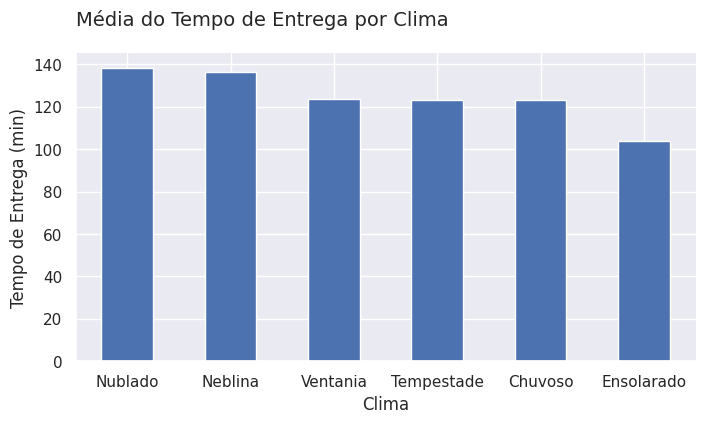

Figure(640x480)


> Finished chain.


{'input': 'Crie um gráfico da média do tempo de entrega por clima. Ordene do maior para o menor valor.',
 'output': <Figure size 640x480 with 0 Axes>}

<Figure size 640x480 with 0 Axes>

In [ ]:
orquestrador.invoke({"input": "Crie um gráfico da média do tempo de entrega por clima. Ordene do maior para o menor valor."})

In [ ]:
orquestrador.invoke({"input": "Qual é a média do tempo de entrega?"})



> Entering new AgentExecutor chain...
Thought: Eu preciso calcular a média da coluna "tempo_entrega" do DataFrame.

Action: Códigos Python
Action Input: `df['tempo_entrega'].mean()`124.90564484784746Final Answer: A média do tempo de entrega é de 124.91 minutos.

> Finished chain.


{'input': 'Qual é a média do tempo de entrega?',
 'output': 'A média do tempo de entrega é de 124.91 minutos.'}